In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
# definicao de funcoes utilitarias... TODO: colocar em um arquivo utilitario .py

def print_dataframe_info(df):
    print(str(df.info()) + '\n')
    print('SHAPE: ' + str(df.shape) + '\n')
    print('DTYPES: ' + str(df.dtypes) + '\n')
    print('#' * 100)
    print(str(df.head(5)) + '\n')
    print('#' * 100)
    print(str(df.tail(5)))


In [48]:
df_original = pd.read_csv('../data/fundo02-cotas-acoes.csv', header=0, encoding='iso-8859-1')
df_original.head(5)

,Código,Fundo,Data,Cota,Variação,Captação,Resgate,PL,Cotistas
0,33293,1421 FUNDO DE INVESTIMENTO DE AÇÕES INVESTIMEN...,27/09/2018,"3,4069383","1,50%","R$ 0,00","R$ 0,00","R$ 13.828.285,51",5
1,33293,1421 FUNDO DE INVESTIMENTO DE AÇÕES INVESTIMEN...,26/09/2018,"3,3564659","0,11%","R$ 0,00","R$ 0,00","R$ 13.623.425,12",5
2,33293,1421 FUNDO DE INVESTIMENTO DE AÇÕES INVESTIMEN...,25/09/2018,"3,352638","-0,10%","R$ 0,00","R$ 0,00","R$ 13.607.888,27",5
3,33293,1421 FUNDO DE INVESTIMENTO DE AÇÕES INVESTIMEN...,24/09/2018,"3,3559605","-1,34%","R$ 0,00","R$ 0,00","R$ 13.621.373,77",5
4,33293,1421 FUNDO DE INVESTIMENTO DE AÇÕES INVESTIMEN...,21/09/2018,"3,4016722","1,79%","R$ 0,00","R$ 0,00","R$ 13.806.911,13",5


In [49]:
print("Descricao basica do dataframe original e seu conteudo: \n")
print_dataframe_info(df_original)

Descricao basica do dataframe original e seu conteudo: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
Código      894 non-null int64
Fundo       894 non-null object
Data        894 non-null object
Cota        894 non-null object
Variação    893 non-null object
Captação    894 non-null object
Resgate     894 non-null object
PL          894 non-null object
Cotistas    894 non-null int64
dtypes: int64(2), object(7)
memory usage: 62.9+ KB
None

SHAPE: (894, 9)

DTYPES: Código       int64
Fundo       object
Data        object
Cota        object
Variação    object
Captação    object
Resgate     object
PL          object
Cotistas     int64
dtype: object

####################################################################################################
   Código                                              Fundo        Data  \
0   33293  1421 FUNDO DE INVESTIMENTO DE AÇÕES INVESTIMEN...  27/09/2018   
1   33293  1421 FUNDO DE INVESTI

In [50]:
df2 = df_original.drop('Código', axis=1)
df2 = df2.drop('Fundo', axis=1)
df2 = df2.drop('Variação', axis=1)
df2 = df2.drop('Captação', axis=1)
df2 = df2.drop('Resgate', axis=1)
df2 = df2.drop('PL', axis=1)
df2 = df2.drop('Cotistas', axis=1)

In [51]:
print("Descricao do dataframe apos remover as colunas: \n")
print_dataframe_info(df2)

Descricao do dataframe apos remover as colunas: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 2 columns):
Data    894 non-null object
Cota    894 non-null object
dtypes: object(2)
memory usage: 14.0+ KB
None

SHAPE: (894, 2)

DTYPES: Data    object
Cota    object
dtype: object

####################################################################################################
         Data       Cota
0  27/09/2018  3,4069383
1  26/09/2018  3,3564659
2  25/09/2018   3,352638
3  24/09/2018  3,3559605
4  21/09/2018  3,4016722

####################################################################################################
           Data       Cota
889  12/03/2015  2,3959649
890  11/03/2015  2,3882901
891  10/03/2015   2,374273
892  09/03/2015  2,3908835
893  06/03/2015  2,4105934


In [52]:
df2['Data'] = pd.to_datetime(df2['Data'], format='%d/%m/%Y')
df2.index = df2['Data']
del df2['Data']

In [53]:
print("Descricao do dataframe apos converter as datas:")
print_dataframe_info(df2)

Descricao do dataframe apos converter as datas:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 894 entries, 2018-09-27 to 2015-03-06
Data columns (total 1 columns):
Cota    894 non-null object
dtypes: object(1)
memory usage: 14.0+ KB
None

SHAPE: (894, 1)

DTYPES: Cota    object
dtype: object

####################################################################################################
                 Cota
Data                 
2018-09-27  3,4069383
2018-09-26  3,3564659
2018-09-25   3,352638
2018-09-24  3,3559605
2018-09-21  3,4016722

####################################################################################################
                 Cota
Data                 
2015-03-12  2,3959649
2015-03-11  2,3882901
2015-03-10   2,374273
2015-03-09  2,3908835
2015-03-06  2,4105934


In [54]:
df2['Cota'] = df2['Cota'].apply(lambda x: float(x.replace(',', '.')))
df2['Cota'] = df2['Cota'].astype(float)

In [55]:
print("Descricao do dataframe apos o processamento do valor da Cota:")
print_dataframe_info(df2)

Descricao do dataframe apos o processamento do valor da Cota:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 894 entries, 2018-09-27 to 2015-03-06
Data columns (total 1 columns):
Cota    894 non-null float64
dtypes: float64(1)
memory usage: 14.0 KB
None

SHAPE: (894, 1)

DTYPES: Cota    float64
dtype: object

####################################################################################################
                Cota
Data                
2018-09-27  3.406938
2018-09-26  3.356466
2018-09-25  3.352638
2018-09-24  3.355961
2018-09-21  3.401672

####################################################################################################
                Cota
Data                
2015-03-12  2.395965
2015-03-11  2.388290
2015-03-10  2.374273
2015-03-09  2.390884
2015-03-06  2.410593


In [56]:
#df2 = df2.sort_values('Data')
df2 = df2.resample('D').ffill() # esse comando jah executa o sort

print("Descricao do dataframe apos preencher as datas que faltam: \n")
print_dataframe_info(df2)

Descricao do dataframe apos preencher as datas que faltam: 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1302 entries, 2015-03-06 to 2018-09-27
Freq: D
Data columns (total 1 columns):
Cota    1302 non-null float64
dtypes: float64(1)
memory usage: 20.3 KB
None

SHAPE: (1302, 1)

DTYPES: Cota    float64
dtype: object

####################################################################################################
                Cota
Data                
2015-03-06  2.410593
2015-03-07  2.410593
2015-03-08  2.410593
2015-03-09  2.390884
2015-03-10  2.374273

####################################################################################################
                Cota
Data                
2018-09-23  3.401672
2018-09-24  3.355961
2018-09-25  3.352638
2018-09-26  3.356466
2018-09-27  3.406938


In [57]:
print(df2['2015-01-01':'2016-01-01'])

                Cota
Data                
2015-03-06  2.410593
2015-03-07  2.410593
2015-03-08  2.410593
2015-03-09  2.390884
2015-03-10  2.374273
2015-03-11  2.388290
2015-03-12  2.395965
2015-03-13  2.395856
2015-03-14  2.395856
2015-03-15  2.395856
2015-03-16  2.399744
2015-03-17  2.422864
2015-03-18  2.447440
2015-03-19  2.449702
2015-03-20  2.454747
2015-03-21  2.454747
2015-03-22  2.454747
2015-03-23  2.453783
2015-03-24  2.458318
2015-03-25  2.465037
2015-03-26  2.449880
2015-03-27  2.443309
2015-03-28  2.443309
2015-03-29  2.443309
2015-03-30  2.465973
2015-03-31  2.466007
2015-04-01  2.483449
2015-04-02  2.496013
2015-04-03  2.496013
2015-04-04  2.496013
...              ...
2015-12-03  2.484938
2015-12-04  2.470750
2015-12-05  2.470750
2015-12-06  2.470750
2015-12-07  2.478564
2015-12-08  2.468837
2015-12-09  2.498878
2015-12-10  2.487664
2015-12-11  2.481573
2015-12-12  2.481573
2015-12-13  2.481573
2015-12-14  2.465609
2015-12-15  2.476281
2015-12-16  2.482978
2015-12-17  2

Text(0.5,0,'Ano')

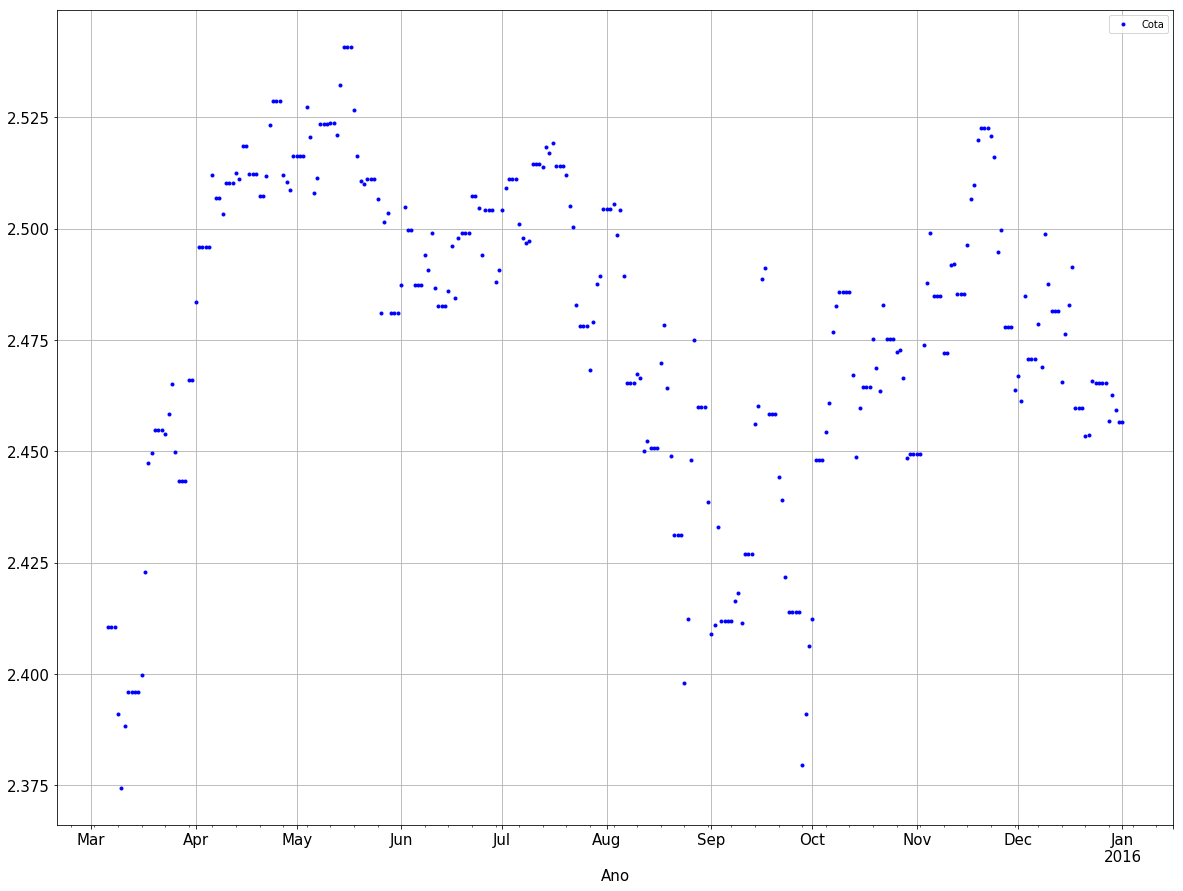

In [58]:
df2['2015-01-01':'2016-01-01'].plot(figsize=(20, 15), linewidth=2, fontsize=15, style='b.')
plt.grid(True)
plt.xlabel('Ano', fontsize=15)

Text(0.5,0,'Ano')

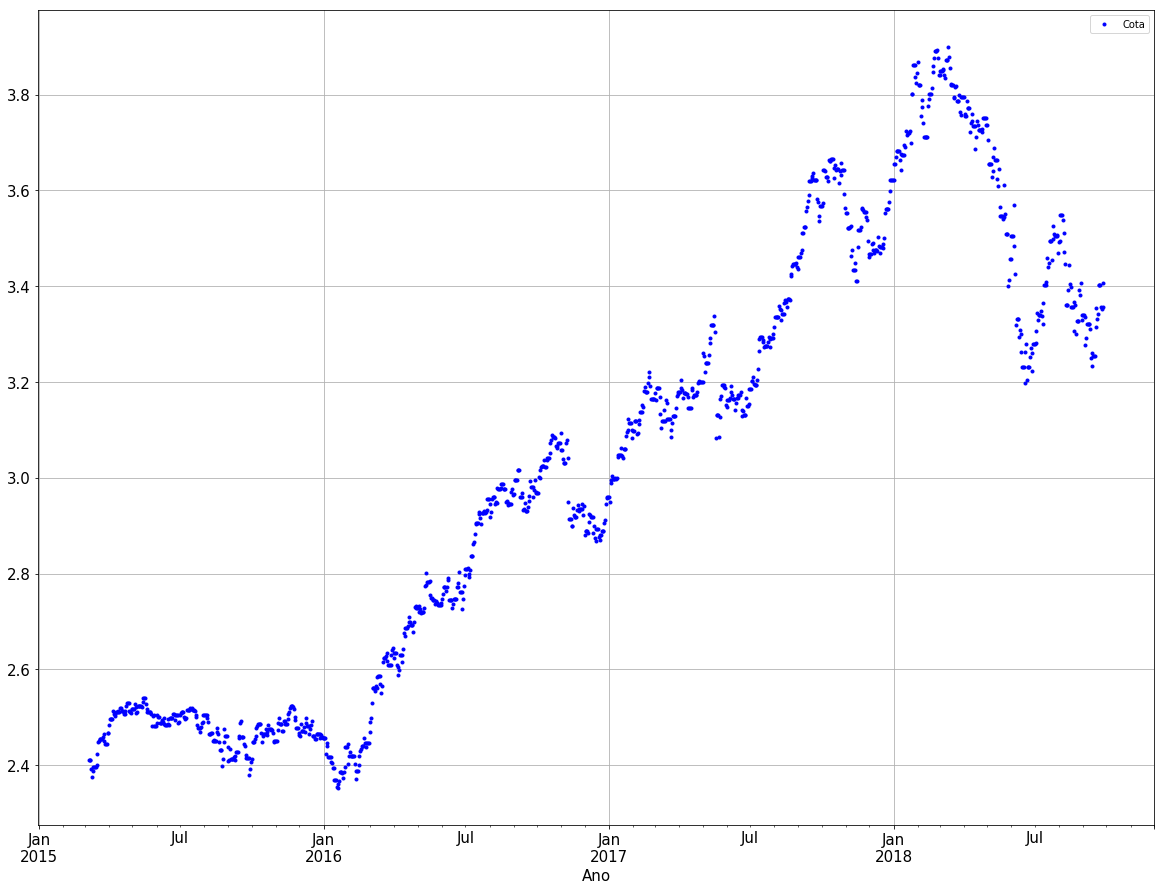

In [59]:
df2.plot(figsize=(20, 15), linewidth=2, fontsize=15, style='b.')
plt.grid(True)
plt.xlabel('Ano', fontsize=15)

In [60]:
df3 = df2.resample('M')
df3 = df3.mean()

In [61]:
print("Descricao do dataframe com valores mensais:")
print_dataframe_info(df3)

Descricao do dataframe com valores mensais:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2015-03-31 to 2018-09-30
Freq: M
Data columns (total 1 columns):
Cota    43 non-null float64
dtypes: float64(1)
memory usage: 688.0 bytes
None

SHAPE: (43, 1)

DTYPES: Cota    float64
dtype: object

####################################################################################################
                Cota
Data                
2015-03-31  2.428526
2015-04-30  2.510269
2015-05-31  2.514323
2015-06-30  2.494611
2015-07-31  2.501899

####################################################################################################
                Cota
Data                
2018-05-31  3.589007
2018-06-30  3.312490
2018-07-31  3.414903
2018-08-31  3.404918
2018-09-30  3.322405


Text(0.5,0,'Ano')

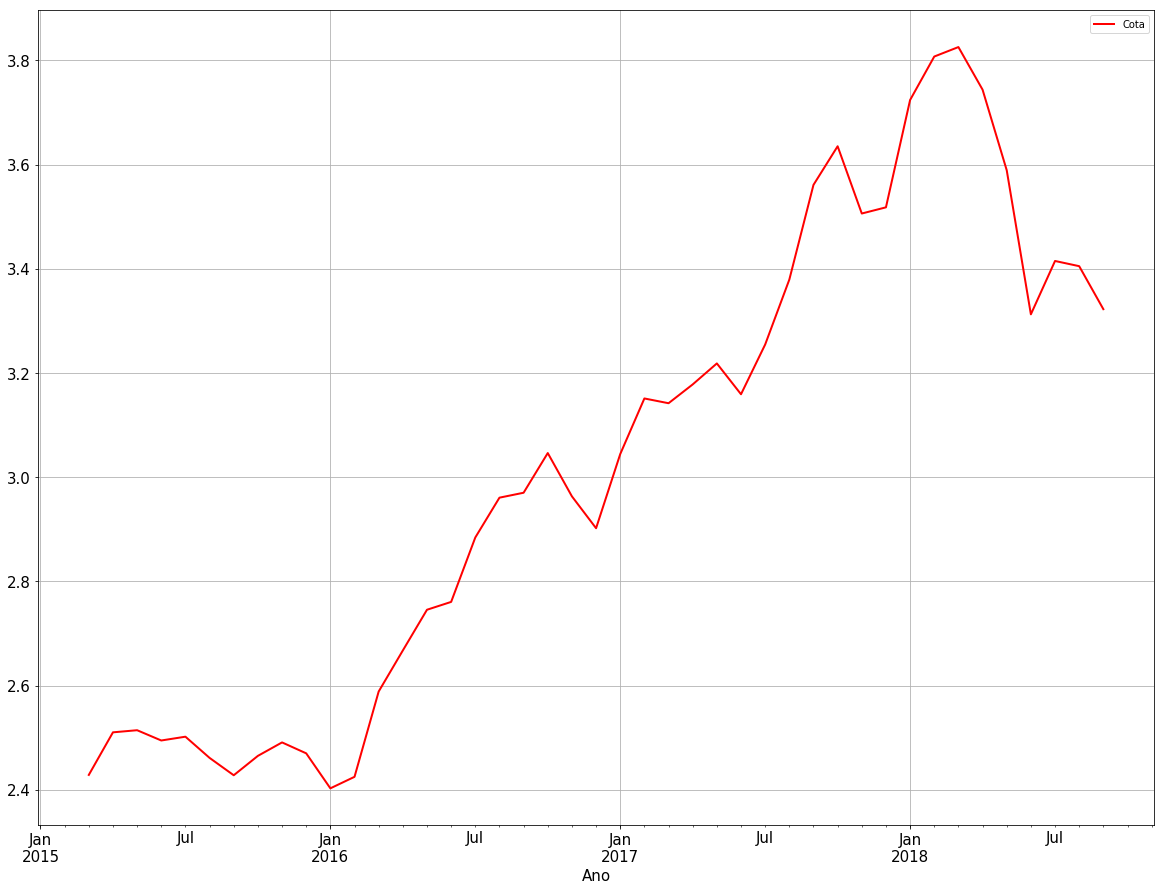

In [62]:
df3.plot(figsize=(20, 15), linewidth=2, fontsize=15, style='r-')
plt.grid(True)
plt.xlabel('Ano', fontsize=15)